># 3. CNN

### Two Methods of Learning
1. File I/O using queue runners
  * load $\rightarrow$ preprocessing $\rightarrow$ train
1. File I/O using Dataset(TFRecord)
  * load $\rightarrow$ preprocessing $\rightarrow$ write dataset $\rightarrow$ load dataest $\rightarrow$ train
  * ETL(Extract, Transform, Load) framework

### Change Img Dimension
* `reduce_mean(XXX, axis=-1)`
* `expand_dim(XXX, axis=-1)`

># 3.1. make TFRecord

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

tf.reset_default_graph()
image_dir = './dataset/images/'
label_name = './dataset/label_csv/label.csv'
image_names = [os.path.join(image_dir, n) for n in os.listdir(image_dir)]
image_names = sorted(image_names)

img_name_queue = tf.train.string_input_producer(image_names, num_epochs=1, shuffle=False)
label_name_queue = tf.train.string_input_producer([label_name], num_epochs=1, shuffle=False)

img_reader = tf.WholeFileReader()
text_reader = tf.TextLineReader()

img_key, img_value = img_reader.read(img_name_queue)
txt_key, txt_value = text_reader.read(label_name_queue)

img_png = tf.image.decode_png(img_value)
img_png = tf.reduce_mean(img_png, axis=-1)
img_png = tf.reshape(img_png, [-1])

txt_csv = tf.decode_csv(txt_value, record_defaults=[[0]])

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess, coord)

    face_train_dir = './dataset/face_train.tfrecord'
    face_test_dir = './dataset/face_test.tfrecord'
    
    train_writer = tf.python_io.TFRecordWriter(face_train_dir)
    test_writer = tf.python_io.TFRecordWriter(face_test_dir)
    
    for i in range(9999999999999):
        try:
            _img, _age = sess.run([img_png, txt_csv])

            example = tf.train.Example()
            example.features.feature['age'].int64_list.value.append(_age[0])
            example.features.feature['img'].int64_list.value.extend(_img.tolist())

            if i <= 6000:
                train_writer.write(example.SerializeToString())
                print('{}th TRAIN record is written'.format(i))        
            else:
                test_writer.write(example.SerializeToString())
                print('{}th TEST record is written'.format(i))        
            
        except tf.errors.OutOfRangeError:
            print('end of record')
            break
            
    train_writer.close()

    coord.request_stop()
    coord.join(thread)

0th TRAIN record is written
1th TRAIN record is written
2th TRAIN record is written
3th TRAIN record is written
4th TRAIN record is written
5th TRAIN record is written
6th TRAIN record is written
7th TRAIN record is written
8th TRAIN record is written
9th TRAIN record is written
10th TRAIN record is written
11th TRAIN record is written
12th TRAIN record is written
13th TRAIN record is written
14th TRAIN record is written
15th TRAIN record is written
16th TRAIN record is written
17th TRAIN record is written
18th TRAIN record is written
19th TRAIN record is written
20th TRAIN record is written
21th TRAIN record is written
22th TRAIN record is written
23th TRAIN record is written
24th TRAIN record is written
25th TRAIN record is written
26th TRAIN record is written
27th TRAIN record is written
28th TRAIN record is written
29th TRAIN record is written
30th TRAIN record is written
31th TRAIN record is written
32th TRAIN record is written
33th TRAIN record is written
34th TRAIN record is wri

298th TRAIN record is written
299th TRAIN record is written
300th TRAIN record is written
301th TRAIN record is written
302th TRAIN record is written
303th TRAIN record is written
304th TRAIN record is written
305th TRAIN record is written
306th TRAIN record is written
307th TRAIN record is written
308th TRAIN record is written
309th TRAIN record is written
310th TRAIN record is written
311th TRAIN record is written
312th TRAIN record is written
313th TRAIN record is written
314th TRAIN record is written
315th TRAIN record is written
316th TRAIN record is written
317th TRAIN record is written
318th TRAIN record is written
319th TRAIN record is written
320th TRAIN record is written
321th TRAIN record is written
322th TRAIN record is written
323th TRAIN record is written
324th TRAIN record is written
325th TRAIN record is written
326th TRAIN record is written
327th TRAIN record is written
328th TRAIN record is written
329th TRAIN record is written
330th TRAIN record is written
331th TRAI

592th TRAIN record is written
593th TRAIN record is written
594th TRAIN record is written
595th TRAIN record is written
596th TRAIN record is written
597th TRAIN record is written
598th TRAIN record is written
599th TRAIN record is written
600th TRAIN record is written
601th TRAIN record is written
602th TRAIN record is written
603th TRAIN record is written
604th TRAIN record is written
605th TRAIN record is written
606th TRAIN record is written
607th TRAIN record is written
608th TRAIN record is written
609th TRAIN record is written
610th TRAIN record is written
611th TRAIN record is written
612th TRAIN record is written
613th TRAIN record is written
614th TRAIN record is written
615th TRAIN record is written
616th TRAIN record is written
617th TRAIN record is written
618th TRAIN record is written
619th TRAIN record is written
620th TRAIN record is written
621th TRAIN record is written
622th TRAIN record is written
623th TRAIN record is written
624th TRAIN record is written
625th TRAI

893th TRAIN record is written
894th TRAIN record is written
895th TRAIN record is written
896th TRAIN record is written
897th TRAIN record is written
898th TRAIN record is written
899th TRAIN record is written
900th TRAIN record is written
901th TRAIN record is written
902th TRAIN record is written
903th TRAIN record is written
904th TRAIN record is written
905th TRAIN record is written
906th TRAIN record is written
907th TRAIN record is written
908th TRAIN record is written
909th TRAIN record is written
910th TRAIN record is written
911th TRAIN record is written
912th TRAIN record is written
913th TRAIN record is written
914th TRAIN record is written
915th TRAIN record is written
916th TRAIN record is written
917th TRAIN record is written
918th TRAIN record is written
919th TRAIN record is written
920th TRAIN record is written
921th TRAIN record is written
922th TRAIN record is written
923th TRAIN record is written
924th TRAIN record is written
925th TRAIN record is written
926th TRAI

1163th TRAIN record is written
1164th TRAIN record is written
1165th TRAIN record is written
1166th TRAIN record is written
1167th TRAIN record is written
1168th TRAIN record is written
1169th TRAIN record is written
1170th TRAIN record is written
1171th TRAIN record is written
1172th TRAIN record is written
1173th TRAIN record is written
1174th TRAIN record is written
1175th TRAIN record is written
1176th TRAIN record is written
1177th TRAIN record is written
1178th TRAIN record is written
1179th TRAIN record is written
1180th TRAIN record is written
1181th TRAIN record is written
1182th TRAIN record is written
1183th TRAIN record is written
1184th TRAIN record is written
1185th TRAIN record is written
1186th TRAIN record is written
1187th TRAIN record is written
1188th TRAIN record is written
1189th TRAIN record is written
1190th TRAIN record is written
1191th TRAIN record is written
1192th TRAIN record is written
1193th TRAIN record is written
1194th TRAIN record is written
1195th T

1458th TRAIN record is written
1459th TRAIN record is written
1460th TRAIN record is written
1461th TRAIN record is written
1462th TRAIN record is written
1463th TRAIN record is written
1464th TRAIN record is written
1465th TRAIN record is written
1466th TRAIN record is written
1467th TRAIN record is written
1468th TRAIN record is written
1469th TRAIN record is written
1470th TRAIN record is written
1471th TRAIN record is written
1472th TRAIN record is written
1473th TRAIN record is written
1474th TRAIN record is written
1475th TRAIN record is written
1476th TRAIN record is written
1477th TRAIN record is written
1478th TRAIN record is written
1479th TRAIN record is written
1480th TRAIN record is written
1481th TRAIN record is written
1482th TRAIN record is written
1483th TRAIN record is written
1484th TRAIN record is written
1485th TRAIN record is written
1486th TRAIN record is written
1487th TRAIN record is written
1488th TRAIN record is written
1489th TRAIN record is written
1490th T

1727th TRAIN record is written
1728th TRAIN record is written
1729th TRAIN record is written
1730th TRAIN record is written
1731th TRAIN record is written
1732th TRAIN record is written
1733th TRAIN record is written
1734th TRAIN record is written
1735th TRAIN record is written
1736th TRAIN record is written
1737th TRAIN record is written
1738th TRAIN record is written
1739th TRAIN record is written
1740th TRAIN record is written
1741th TRAIN record is written
1742th TRAIN record is written
1743th TRAIN record is written
1744th TRAIN record is written
1745th TRAIN record is written
1746th TRAIN record is written
1747th TRAIN record is written
1748th TRAIN record is written
1749th TRAIN record is written
1750th TRAIN record is written
1751th TRAIN record is written
1752th TRAIN record is written
1753th TRAIN record is written
1754th TRAIN record is written
1755th TRAIN record is written
1756th TRAIN record is written
1757th TRAIN record is written
1758th TRAIN record is written
1759th T

1997th TRAIN record is written
1998th TRAIN record is written
1999th TRAIN record is written
2000th TRAIN record is written
2001th TRAIN record is written
2002th TRAIN record is written
2003th TRAIN record is written
2004th TRAIN record is written
2005th TRAIN record is written
2006th TRAIN record is written
2007th TRAIN record is written
2008th TRAIN record is written
2009th TRAIN record is written
2010th TRAIN record is written
2011th TRAIN record is written
2012th TRAIN record is written
2013th TRAIN record is written
2014th TRAIN record is written
2015th TRAIN record is written
2016th TRAIN record is written
2017th TRAIN record is written
2018th TRAIN record is written
2019th TRAIN record is written
2020th TRAIN record is written
2021th TRAIN record is written
2022th TRAIN record is written
2023th TRAIN record is written
2024th TRAIN record is written
2025th TRAIN record is written
2026th TRAIN record is written
2027th TRAIN record is written
2028th TRAIN record is written
2029th T

2293th TRAIN record is written
2294th TRAIN record is written
2295th TRAIN record is written
2296th TRAIN record is written
2297th TRAIN record is written
2298th TRAIN record is written
2299th TRAIN record is written
2300th TRAIN record is written
2301th TRAIN record is written
2302th TRAIN record is written
2303th TRAIN record is written
2304th TRAIN record is written
2305th TRAIN record is written
2306th TRAIN record is written
2307th TRAIN record is written
2308th TRAIN record is written
2309th TRAIN record is written
2310th TRAIN record is written
2311th TRAIN record is written
2312th TRAIN record is written
2313th TRAIN record is written
2314th TRAIN record is written
2315th TRAIN record is written
2316th TRAIN record is written
2317th TRAIN record is written
2318th TRAIN record is written
2319th TRAIN record is written
2320th TRAIN record is written
2321th TRAIN record is written
2322th TRAIN record is written
2323th TRAIN record is written
2324th TRAIN record is written
2325th T

2562th TRAIN record is written
2563th TRAIN record is written
2564th TRAIN record is written
2565th TRAIN record is written
2566th TRAIN record is written
2567th TRAIN record is written
2568th TRAIN record is written
2569th TRAIN record is written
2570th TRAIN record is written
2571th TRAIN record is written
2572th TRAIN record is written
2573th TRAIN record is written
2574th TRAIN record is written
2575th TRAIN record is written
2576th TRAIN record is written
2577th TRAIN record is written
2578th TRAIN record is written
2579th TRAIN record is written
2580th TRAIN record is written
2581th TRAIN record is written
2582th TRAIN record is written
2583th TRAIN record is written
2584th TRAIN record is written
2585th TRAIN record is written
2586th TRAIN record is written
2587th TRAIN record is written
2588th TRAIN record is written
2589th TRAIN record is written
2590th TRAIN record is written
2591th TRAIN record is written
2592th TRAIN record is written
2593th TRAIN record is written
2594th T

2830th TRAIN record is written
2831th TRAIN record is written
2832th TRAIN record is written
2833th TRAIN record is written
2834th TRAIN record is written
2835th TRAIN record is written
2836th TRAIN record is written
2837th TRAIN record is written
2838th TRAIN record is written
2839th TRAIN record is written
2840th TRAIN record is written
2841th TRAIN record is written
2842th TRAIN record is written
2843th TRAIN record is written
2844th TRAIN record is written
2845th TRAIN record is written
2846th TRAIN record is written
2847th TRAIN record is written
2848th TRAIN record is written
2849th TRAIN record is written
2850th TRAIN record is written
2851th TRAIN record is written
2852th TRAIN record is written
2853th TRAIN record is written
2854th TRAIN record is written
2855th TRAIN record is written
2856th TRAIN record is written
2857th TRAIN record is written
2858th TRAIN record is written
2859th TRAIN record is written
2860th TRAIN record is written
2861th TRAIN record is written
2862th T

3098th TRAIN record is written
3099th TRAIN record is written
3100th TRAIN record is written
3101th TRAIN record is written
3102th TRAIN record is written
3103th TRAIN record is written
3104th TRAIN record is written
3105th TRAIN record is written
3106th TRAIN record is written
3107th TRAIN record is written
3108th TRAIN record is written
3109th TRAIN record is written
3110th TRAIN record is written
3111th TRAIN record is written
3112th TRAIN record is written
3113th TRAIN record is written
3114th TRAIN record is written
3115th TRAIN record is written
3116th TRAIN record is written
3117th TRAIN record is written
3118th TRAIN record is written
3119th TRAIN record is written
3120th TRAIN record is written
3121th TRAIN record is written
3122th TRAIN record is written
3123th TRAIN record is written
3124th TRAIN record is written
3125th TRAIN record is written
3126th TRAIN record is written
3127th TRAIN record is written
3128th TRAIN record is written
3129th TRAIN record is written
3130th T

3364th TRAIN record is written
3365th TRAIN record is written
3366th TRAIN record is written
3367th TRAIN record is written
3368th TRAIN record is written
3369th TRAIN record is written
3370th TRAIN record is written
3371th TRAIN record is written
3372th TRAIN record is written
3373th TRAIN record is written
3374th TRAIN record is written
3375th TRAIN record is written
3376th TRAIN record is written
3377th TRAIN record is written
3378th TRAIN record is written
3379th TRAIN record is written
3380th TRAIN record is written
3381th TRAIN record is written
3382th TRAIN record is written
3383th TRAIN record is written
3384th TRAIN record is written
3385th TRAIN record is written
3386th TRAIN record is written
3387th TRAIN record is written
3388th TRAIN record is written
3389th TRAIN record is written
3390th TRAIN record is written
3391th TRAIN record is written
3392th TRAIN record is written
3393th TRAIN record is written
3394th TRAIN record is written
3395th TRAIN record is written
3396th T

3640th TRAIN record is written
3641th TRAIN record is written
3642th TRAIN record is written
3643th TRAIN record is written
3644th TRAIN record is written
3645th TRAIN record is written
3646th TRAIN record is written
3647th TRAIN record is written
3648th TRAIN record is written
3649th TRAIN record is written
3650th TRAIN record is written
3651th TRAIN record is written
3652th TRAIN record is written
3653th TRAIN record is written
3654th TRAIN record is written
3655th TRAIN record is written
3656th TRAIN record is written
3657th TRAIN record is written
3658th TRAIN record is written
3659th TRAIN record is written
3660th TRAIN record is written
3661th TRAIN record is written
3662th TRAIN record is written
3663th TRAIN record is written
3664th TRAIN record is written
3665th TRAIN record is written
3666th TRAIN record is written
3667th TRAIN record is written
3668th TRAIN record is written
3669th TRAIN record is written
3670th TRAIN record is written
3671th TRAIN record is written
3672th T

3937th TRAIN record is written
3938th TRAIN record is written
3939th TRAIN record is written
3940th TRAIN record is written
3941th TRAIN record is written
3942th TRAIN record is written
3943th TRAIN record is written
3944th TRAIN record is written
3945th TRAIN record is written
3946th TRAIN record is written
3947th TRAIN record is written
3948th TRAIN record is written
3949th TRAIN record is written
3950th TRAIN record is written
3951th TRAIN record is written
3952th TRAIN record is written
3953th TRAIN record is written
3954th TRAIN record is written
3955th TRAIN record is written
3956th TRAIN record is written
3957th TRAIN record is written
3958th TRAIN record is written
3959th TRAIN record is written
3960th TRAIN record is written
3961th TRAIN record is written
3962th TRAIN record is written
3963th TRAIN record is written
3964th TRAIN record is written
3965th TRAIN record is written
3966th TRAIN record is written
3967th TRAIN record is written
3968th TRAIN record is written
3969th T

4239th TRAIN record is written
4240th TRAIN record is written
4241th TRAIN record is written
4242th TRAIN record is written
4243th TRAIN record is written
4244th TRAIN record is written
4245th TRAIN record is written
4246th TRAIN record is written
4247th TRAIN record is written
4248th TRAIN record is written
4249th TRAIN record is written
4250th TRAIN record is written
4251th TRAIN record is written
4252th TRAIN record is written
4253th TRAIN record is written
4254th TRAIN record is written
4255th TRAIN record is written
4256th TRAIN record is written
4257th TRAIN record is written
4258th TRAIN record is written
4259th TRAIN record is written
4260th TRAIN record is written
4261th TRAIN record is written
4262th TRAIN record is written
4263th TRAIN record is written
4264th TRAIN record is written
4265th TRAIN record is written
4266th TRAIN record is written
4267th TRAIN record is written
4268th TRAIN record is written
4269th TRAIN record is written
4270th TRAIN record is written
4271th T

4507th TRAIN record is written
4508th TRAIN record is written
4509th TRAIN record is written
4510th TRAIN record is written
4511th TRAIN record is written
4512th TRAIN record is written
4513th TRAIN record is written
4514th TRAIN record is written
4515th TRAIN record is written
4516th TRAIN record is written
4517th TRAIN record is written
4518th TRAIN record is written
4519th TRAIN record is written
4520th TRAIN record is written
4521th TRAIN record is written
4522th TRAIN record is written
4523th TRAIN record is written
4524th TRAIN record is written
4525th TRAIN record is written
4526th TRAIN record is written
4527th TRAIN record is written
4528th TRAIN record is written
4529th TRAIN record is written
4530th TRAIN record is written
4531th TRAIN record is written
4532th TRAIN record is written
4533th TRAIN record is written
4534th TRAIN record is written
4535th TRAIN record is written
4536th TRAIN record is written
4537th TRAIN record is written
4538th TRAIN record is written
4539th T

4776th TRAIN record is written
4777th TRAIN record is written
4778th TRAIN record is written
4779th TRAIN record is written
4780th TRAIN record is written
4781th TRAIN record is written
4782th TRAIN record is written
4783th TRAIN record is written
4784th TRAIN record is written
4785th TRAIN record is written
4786th TRAIN record is written
4787th TRAIN record is written
4788th TRAIN record is written
4789th TRAIN record is written
4790th TRAIN record is written
4791th TRAIN record is written
4792th TRAIN record is written
4793th TRAIN record is written
4794th TRAIN record is written
4795th TRAIN record is written
4796th TRAIN record is written
4797th TRAIN record is written
4798th TRAIN record is written
4799th TRAIN record is written
4800th TRAIN record is written
4801th TRAIN record is written
4802th TRAIN record is written
4803th TRAIN record is written
4804th TRAIN record is written
4805th TRAIN record is written
4806th TRAIN record is written
4807th TRAIN record is written
4808th T

5044th TRAIN record is written
5045th TRAIN record is written
5046th TRAIN record is written
5047th TRAIN record is written
5048th TRAIN record is written
5049th TRAIN record is written
5050th TRAIN record is written
5051th TRAIN record is written
5052th TRAIN record is written
5053th TRAIN record is written
5054th TRAIN record is written
5055th TRAIN record is written
5056th TRAIN record is written
5057th TRAIN record is written
5058th TRAIN record is written
5059th TRAIN record is written
5060th TRAIN record is written
5061th TRAIN record is written
5062th TRAIN record is written
5063th TRAIN record is written
5064th TRAIN record is written
5065th TRAIN record is written
5066th TRAIN record is written
5067th TRAIN record is written
5068th TRAIN record is written
5069th TRAIN record is written
5070th TRAIN record is written
5071th TRAIN record is written
5072th TRAIN record is written
5073th TRAIN record is written
5074th TRAIN record is written
5075th TRAIN record is written
5076th T

5330th TRAIN record is written
5331th TRAIN record is written
5332th TRAIN record is written
5333th TRAIN record is written
5334th TRAIN record is written
5335th TRAIN record is written
5336th TRAIN record is written
5337th TRAIN record is written
5338th TRAIN record is written
5339th TRAIN record is written
5340th TRAIN record is written
5341th TRAIN record is written
5342th TRAIN record is written
5343th TRAIN record is written
5344th TRAIN record is written
5345th TRAIN record is written
5346th TRAIN record is written
5347th TRAIN record is written
5348th TRAIN record is written
5349th TRAIN record is written
5350th TRAIN record is written
5351th TRAIN record is written
5352th TRAIN record is written
5353th TRAIN record is written
5354th TRAIN record is written
5355th TRAIN record is written
5356th TRAIN record is written
5357th TRAIN record is written
5358th TRAIN record is written
5359th TRAIN record is written
5360th TRAIN record is written
5361th TRAIN record is written
5362th T

5602th TRAIN record is written
5603th TRAIN record is written
5604th TRAIN record is written
5605th TRAIN record is written
5606th TRAIN record is written
5607th TRAIN record is written
5608th TRAIN record is written
5609th TRAIN record is written
5610th TRAIN record is written
5611th TRAIN record is written
5612th TRAIN record is written
5613th TRAIN record is written
5614th TRAIN record is written
5615th TRAIN record is written
5616th TRAIN record is written
5617th TRAIN record is written
5618th TRAIN record is written
5619th TRAIN record is written
5620th TRAIN record is written
5621th TRAIN record is written
5622th TRAIN record is written
5623th TRAIN record is written
5624th TRAIN record is written
5625th TRAIN record is written
5626th TRAIN record is written
5627th TRAIN record is written
5628th TRAIN record is written
5629th TRAIN record is written
5630th TRAIN record is written
5631th TRAIN record is written
5632th TRAIN record is written
5633th TRAIN record is written
5634th T

5872th TRAIN record is written
5873th TRAIN record is written
5874th TRAIN record is written
5875th TRAIN record is written
5876th TRAIN record is written
5877th TRAIN record is written
5878th TRAIN record is written
5879th TRAIN record is written
5880th TRAIN record is written
5881th TRAIN record is written
5882th TRAIN record is written
5883th TRAIN record is written
5884th TRAIN record is written
5885th TRAIN record is written
5886th TRAIN record is written
5887th TRAIN record is written
5888th TRAIN record is written
5889th TRAIN record is written
5890th TRAIN record is written
5891th TRAIN record is written
5892th TRAIN record is written
5893th TRAIN record is written
5894th TRAIN record is written
5895th TRAIN record is written
5896th TRAIN record is written
5897th TRAIN record is written
5898th TRAIN record is written
5899th TRAIN record is written
5900th TRAIN record is written
5901th TRAIN record is written
5902th TRAIN record is written
5903th TRAIN record is written
5904th T

6157th TEST record is written
6158th TEST record is written
6159th TEST record is written
6160th TEST record is written
6161th TEST record is written
6162th TEST record is written
6163th TEST record is written
6164th TEST record is written
6165th TEST record is written
6166th TEST record is written
6167th TEST record is written
6168th TEST record is written
6169th TEST record is written
6170th TEST record is written
6171th TEST record is written
6172th TEST record is written
6173th TEST record is written
6174th TEST record is written
6175th TEST record is written
6176th TEST record is written
6177th TEST record is written
6178th TEST record is written
6179th TEST record is written
6180th TEST record is written
6181th TEST record is written
6182th TEST record is written
6183th TEST record is written
6184th TEST record is written
6185th TEST record is written
6186th TEST record is written
6187th TEST record is written
6188th TEST record is written
6189th TEST record is written
6190th TES

6447th TEST record is written
6448th TEST record is written
6449th TEST record is written
6450th TEST record is written
6451th TEST record is written
6452th TEST record is written
6453th TEST record is written
6454th TEST record is written
6455th TEST record is written
6456th TEST record is written
6457th TEST record is written
6458th TEST record is written
6459th TEST record is written
6460th TEST record is written
6461th TEST record is written
6462th TEST record is written
6463th TEST record is written
6464th TEST record is written
6465th TEST record is written
6466th TEST record is written
6467th TEST record is written
6468th TEST record is written
6469th TEST record is written
6470th TEST record is written
6471th TEST record is written
6472th TEST record is written
6473th TEST record is written
6474th TEST record is written
6475th TEST record is written
6476th TEST record is written
6477th TEST record is written
6478th TEST record is written
6479th TEST record is written
6480th TES

6758th TEST record is written
6759th TEST record is written
6760th TEST record is written
6761th TEST record is written
6762th TEST record is written
6763th TEST record is written
6764th TEST record is written
6765th TEST record is written
6766th TEST record is written
6767th TEST record is written
6768th TEST record is written
6769th TEST record is written
6770th TEST record is written
6771th TEST record is written
6772th TEST record is written
6773th TEST record is written
6774th TEST record is written
6775th TEST record is written
6776th TEST record is written
6777th TEST record is written
6778th TEST record is written
6779th TEST record is written
6780th TEST record is written
6781th TEST record is written
6782th TEST record is written
6783th TEST record is written
6784th TEST record is written
6785th TEST record is written
6786th TEST record is written
6787th TEST record is written
6788th TEST record is written
6789th TEST record is written
6790th TEST record is written
6791th TES

7043th TEST record is written
7044th TEST record is written
7045th TEST record is written
7046th TEST record is written
7047th TEST record is written
7048th TEST record is written
7049th TEST record is written
7050th TEST record is written
7051th TEST record is written
7052th TEST record is written
7053th TEST record is written
7054th TEST record is written
7055th TEST record is written
7056th TEST record is written
7057th TEST record is written
7058th TEST record is written
7059th TEST record is written
7060th TEST record is written
7061th TEST record is written
7062th TEST record is written
7063th TEST record is written
7064th TEST record is written
7065th TEST record is written
7066th TEST record is written
7067th TEST record is written
7068th TEST record is written
7069th TEST record is written
7070th TEST record is written
7071th TEST record is written
7072th TEST record is written
7073th TEST record is written
7074th TEST record is written
7075th TEST record is written
7076th TES

7331th TEST record is written
7332th TEST record is written
7333th TEST record is written
7334th TEST record is written
7335th TEST record is written
7336th TEST record is written
7337th TEST record is written
7338th TEST record is written
7339th TEST record is written
7340th TEST record is written
7341th TEST record is written
7342th TEST record is written
7343th TEST record is written
7344th TEST record is written
7345th TEST record is written
7346th TEST record is written
7347th TEST record is written
7348th TEST record is written
7349th TEST record is written
7350th TEST record is written
7351th TEST record is written
7352th TEST record is written
7353th TEST record is written
7354th TEST record is written
7355th TEST record is written
7356th TEST record is written
7357th TEST record is written
7358th TEST record is written
7359th TEST record is written
7360th TEST record is written
7361th TEST record is written
7362th TEST record is written
7363th TEST record is written
7364th TES

># 3.2. use TFRecord to read Training Data

[2]


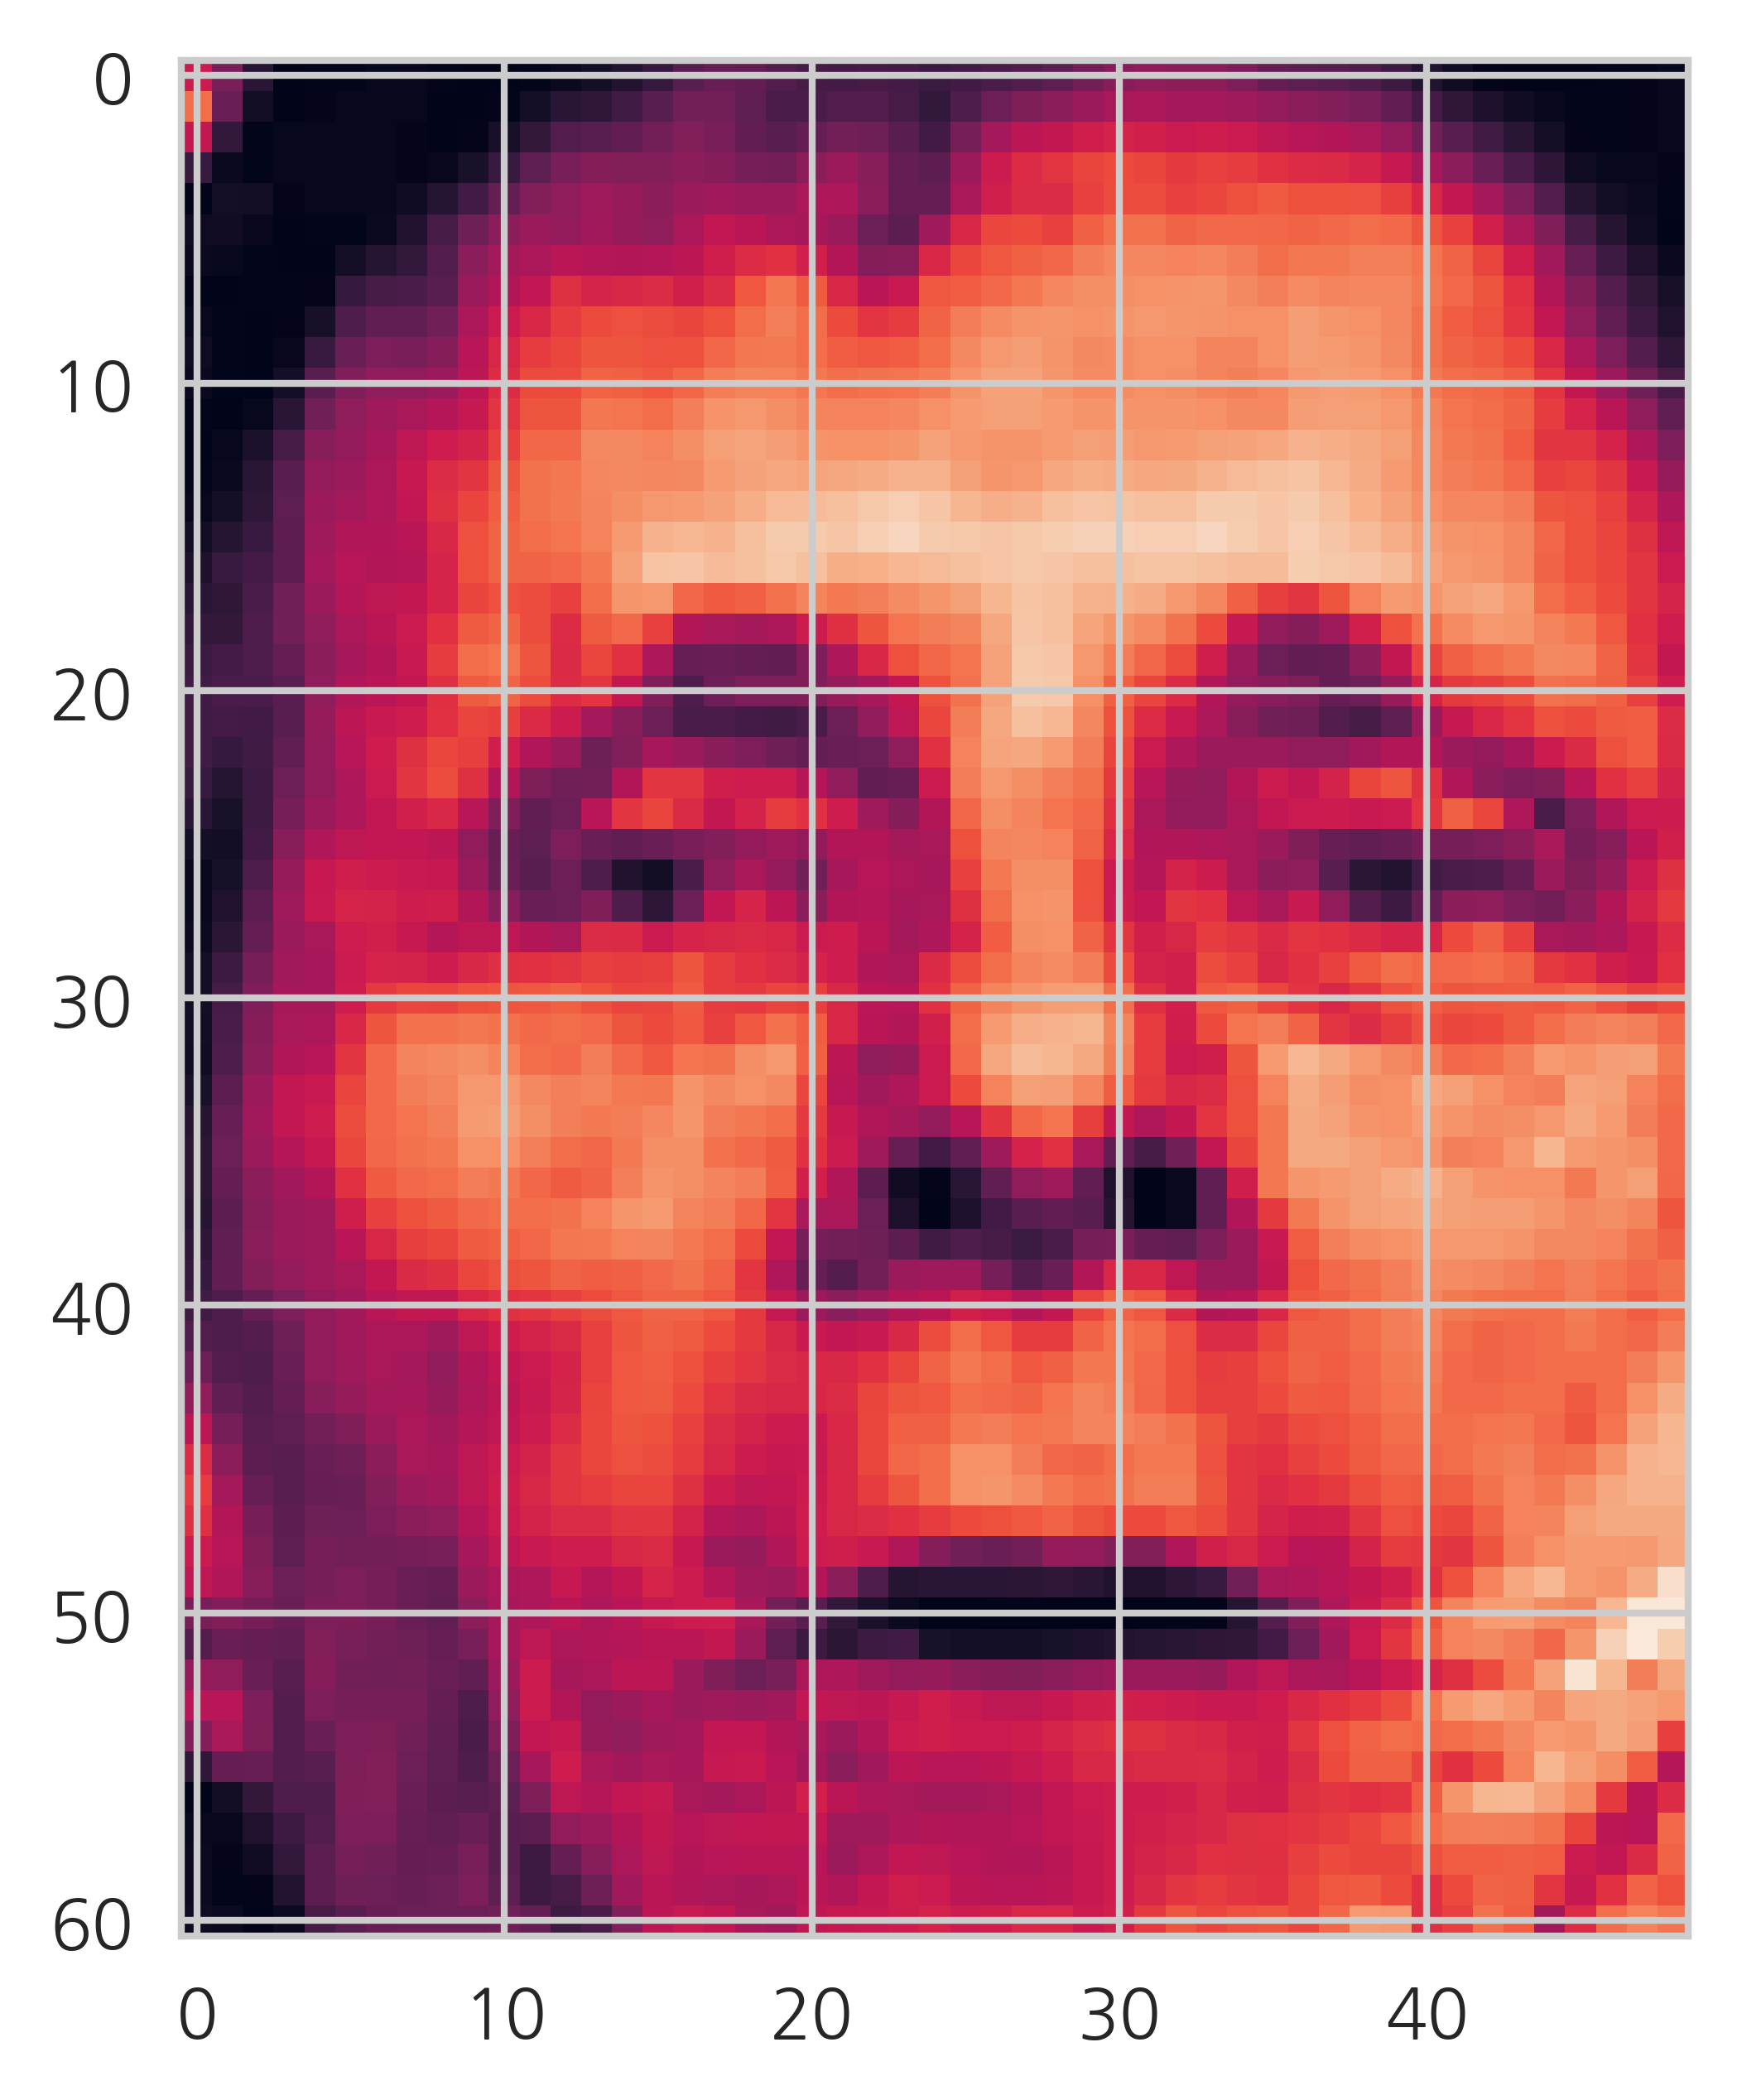

[2]


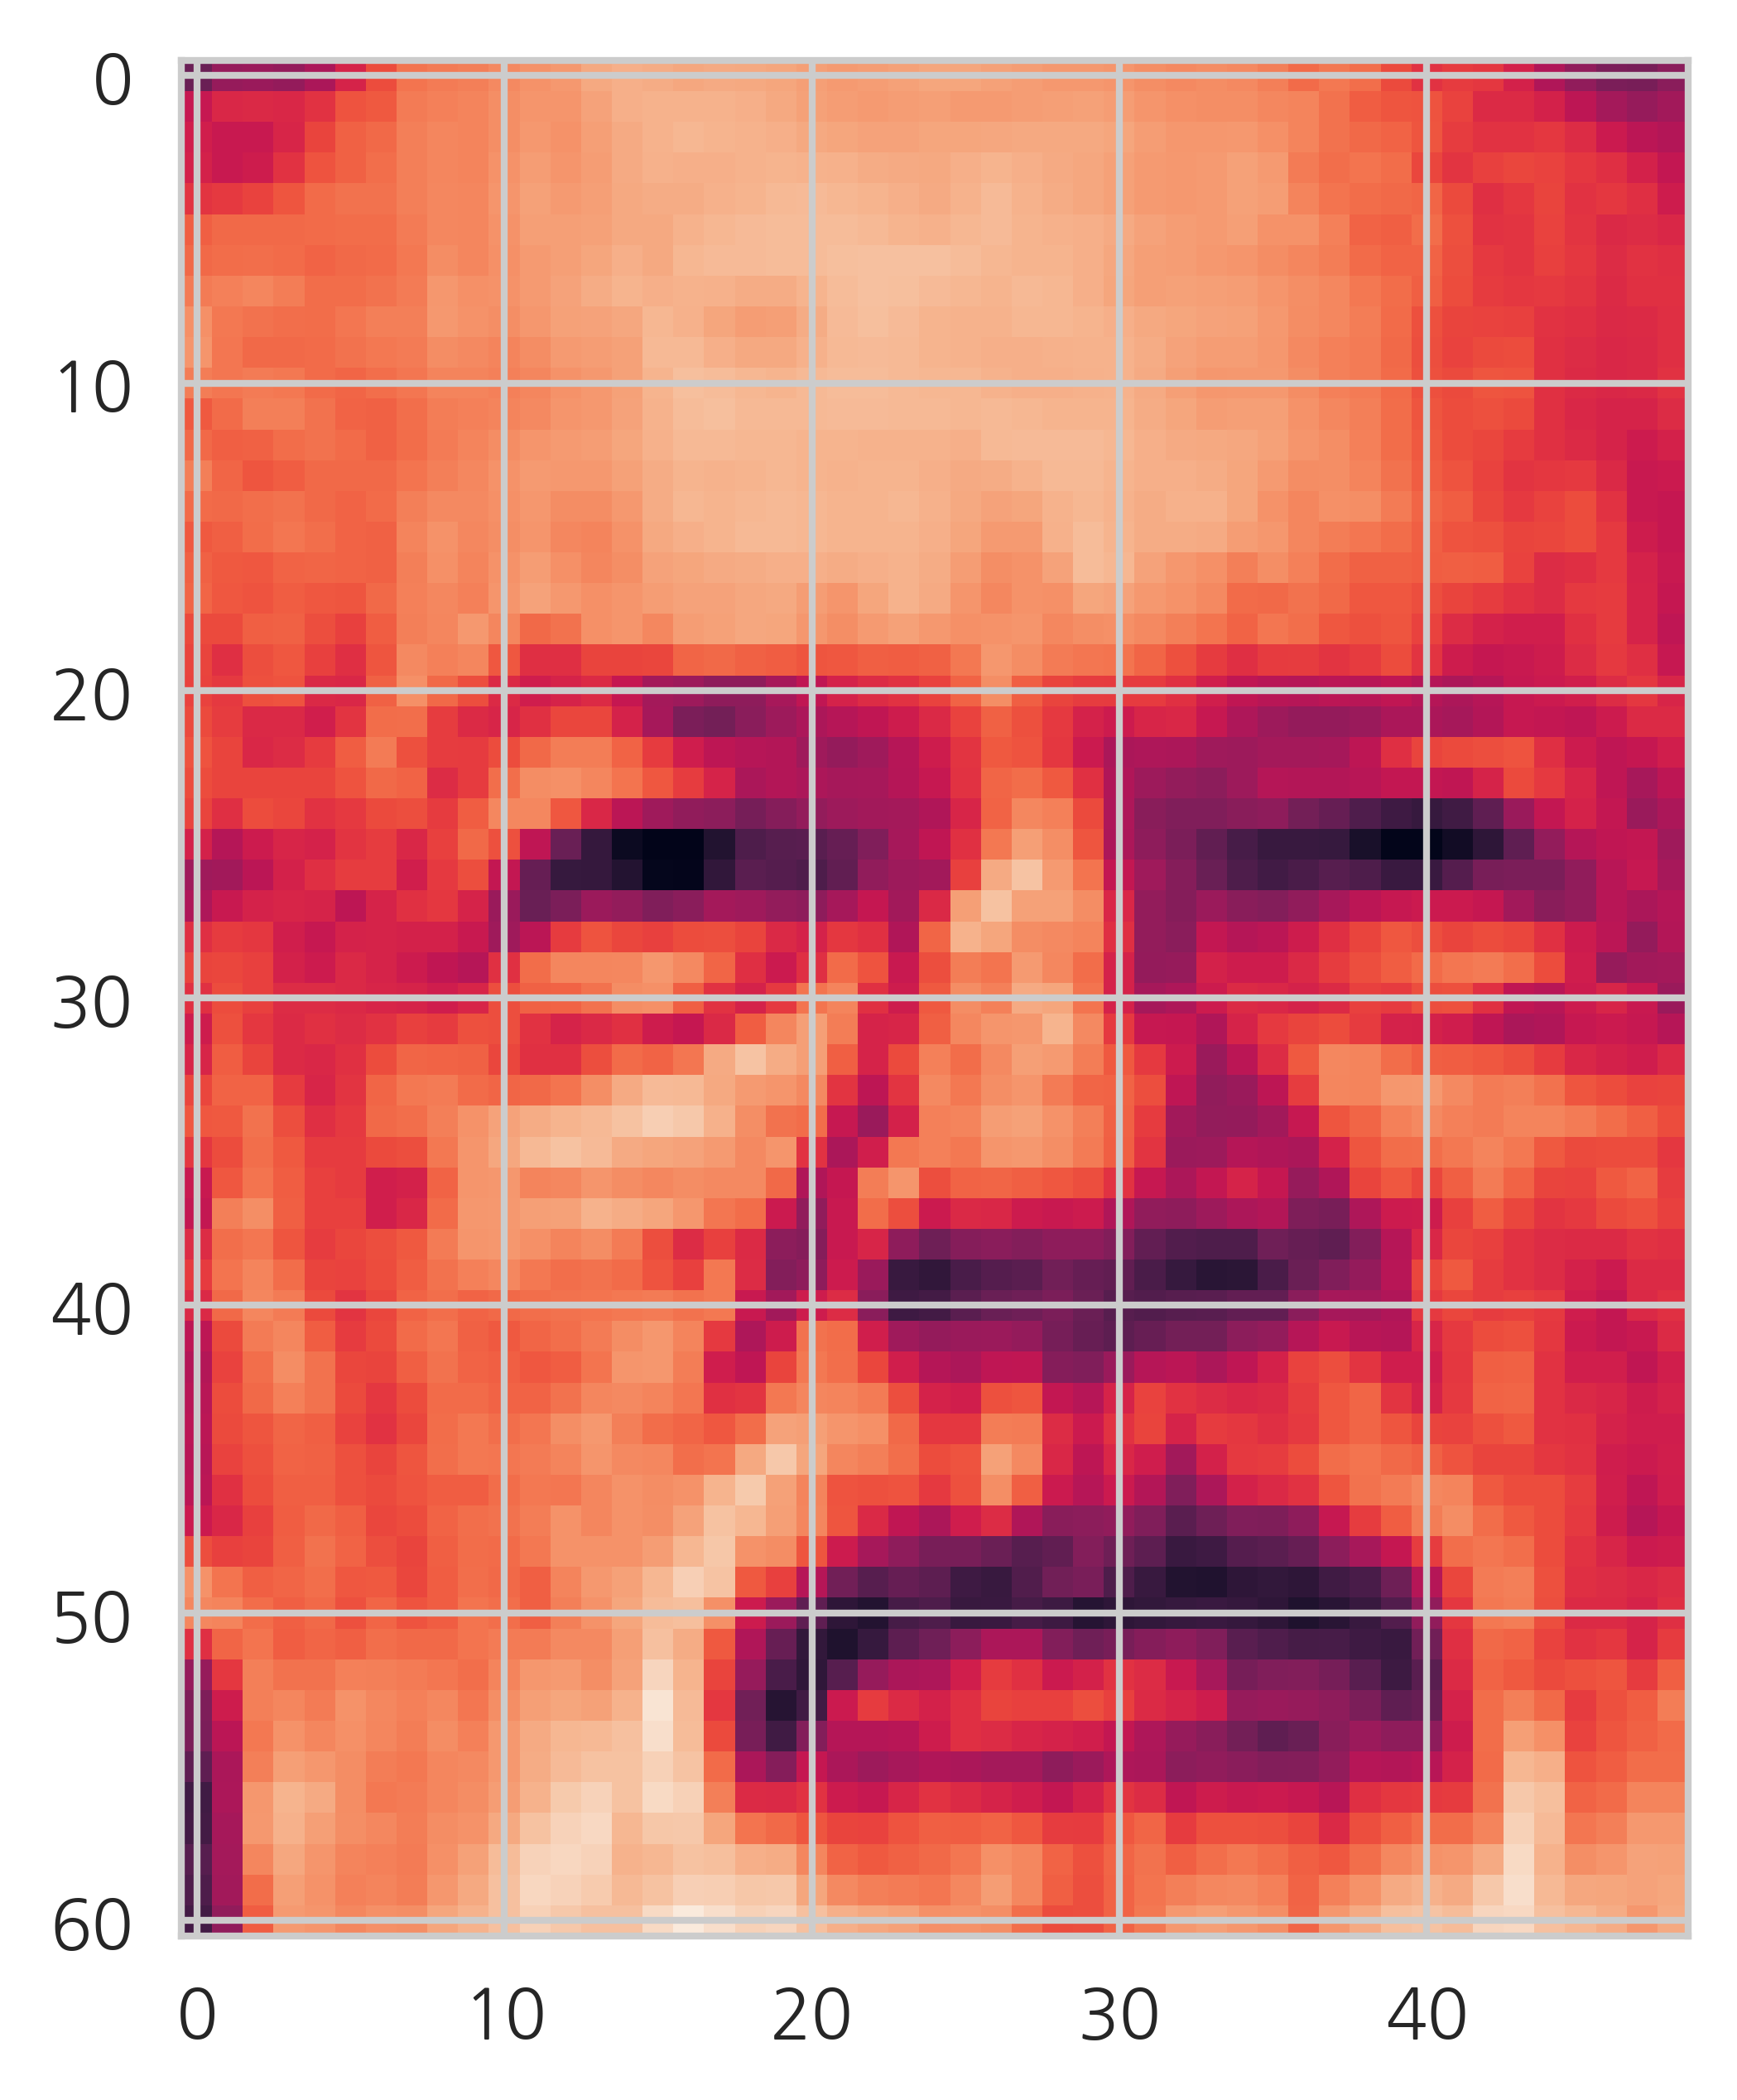

[2]


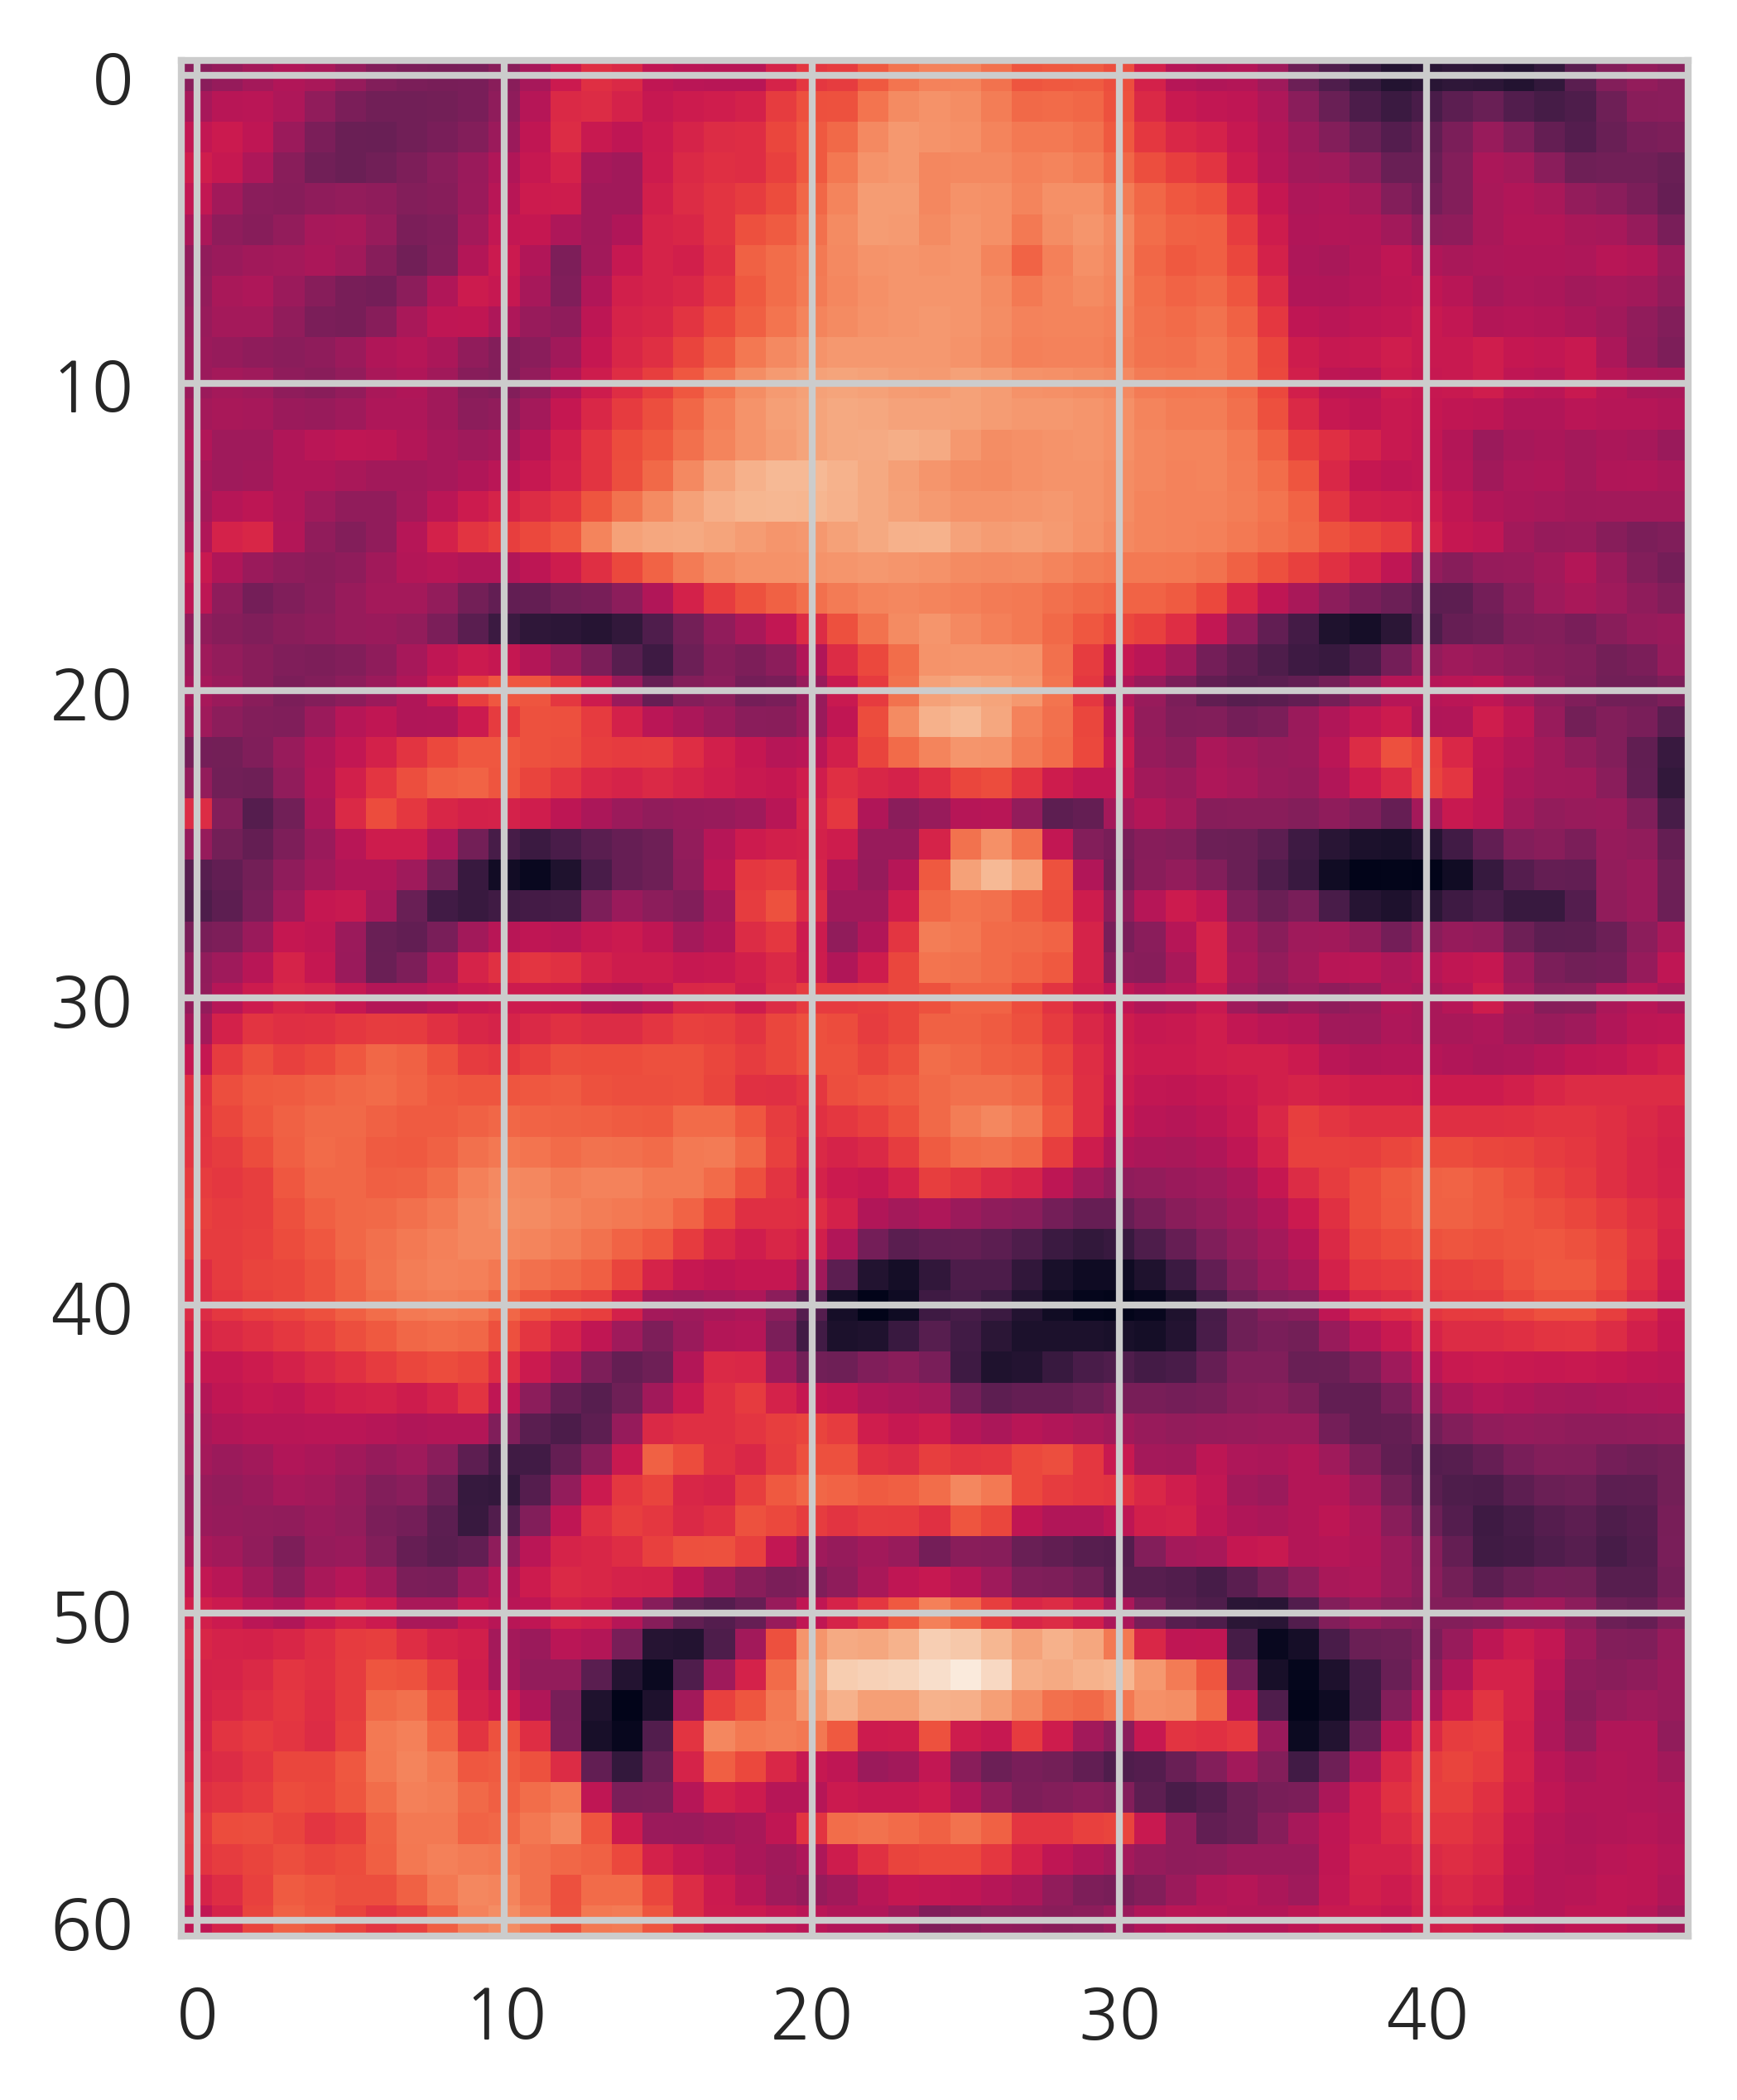

[1]


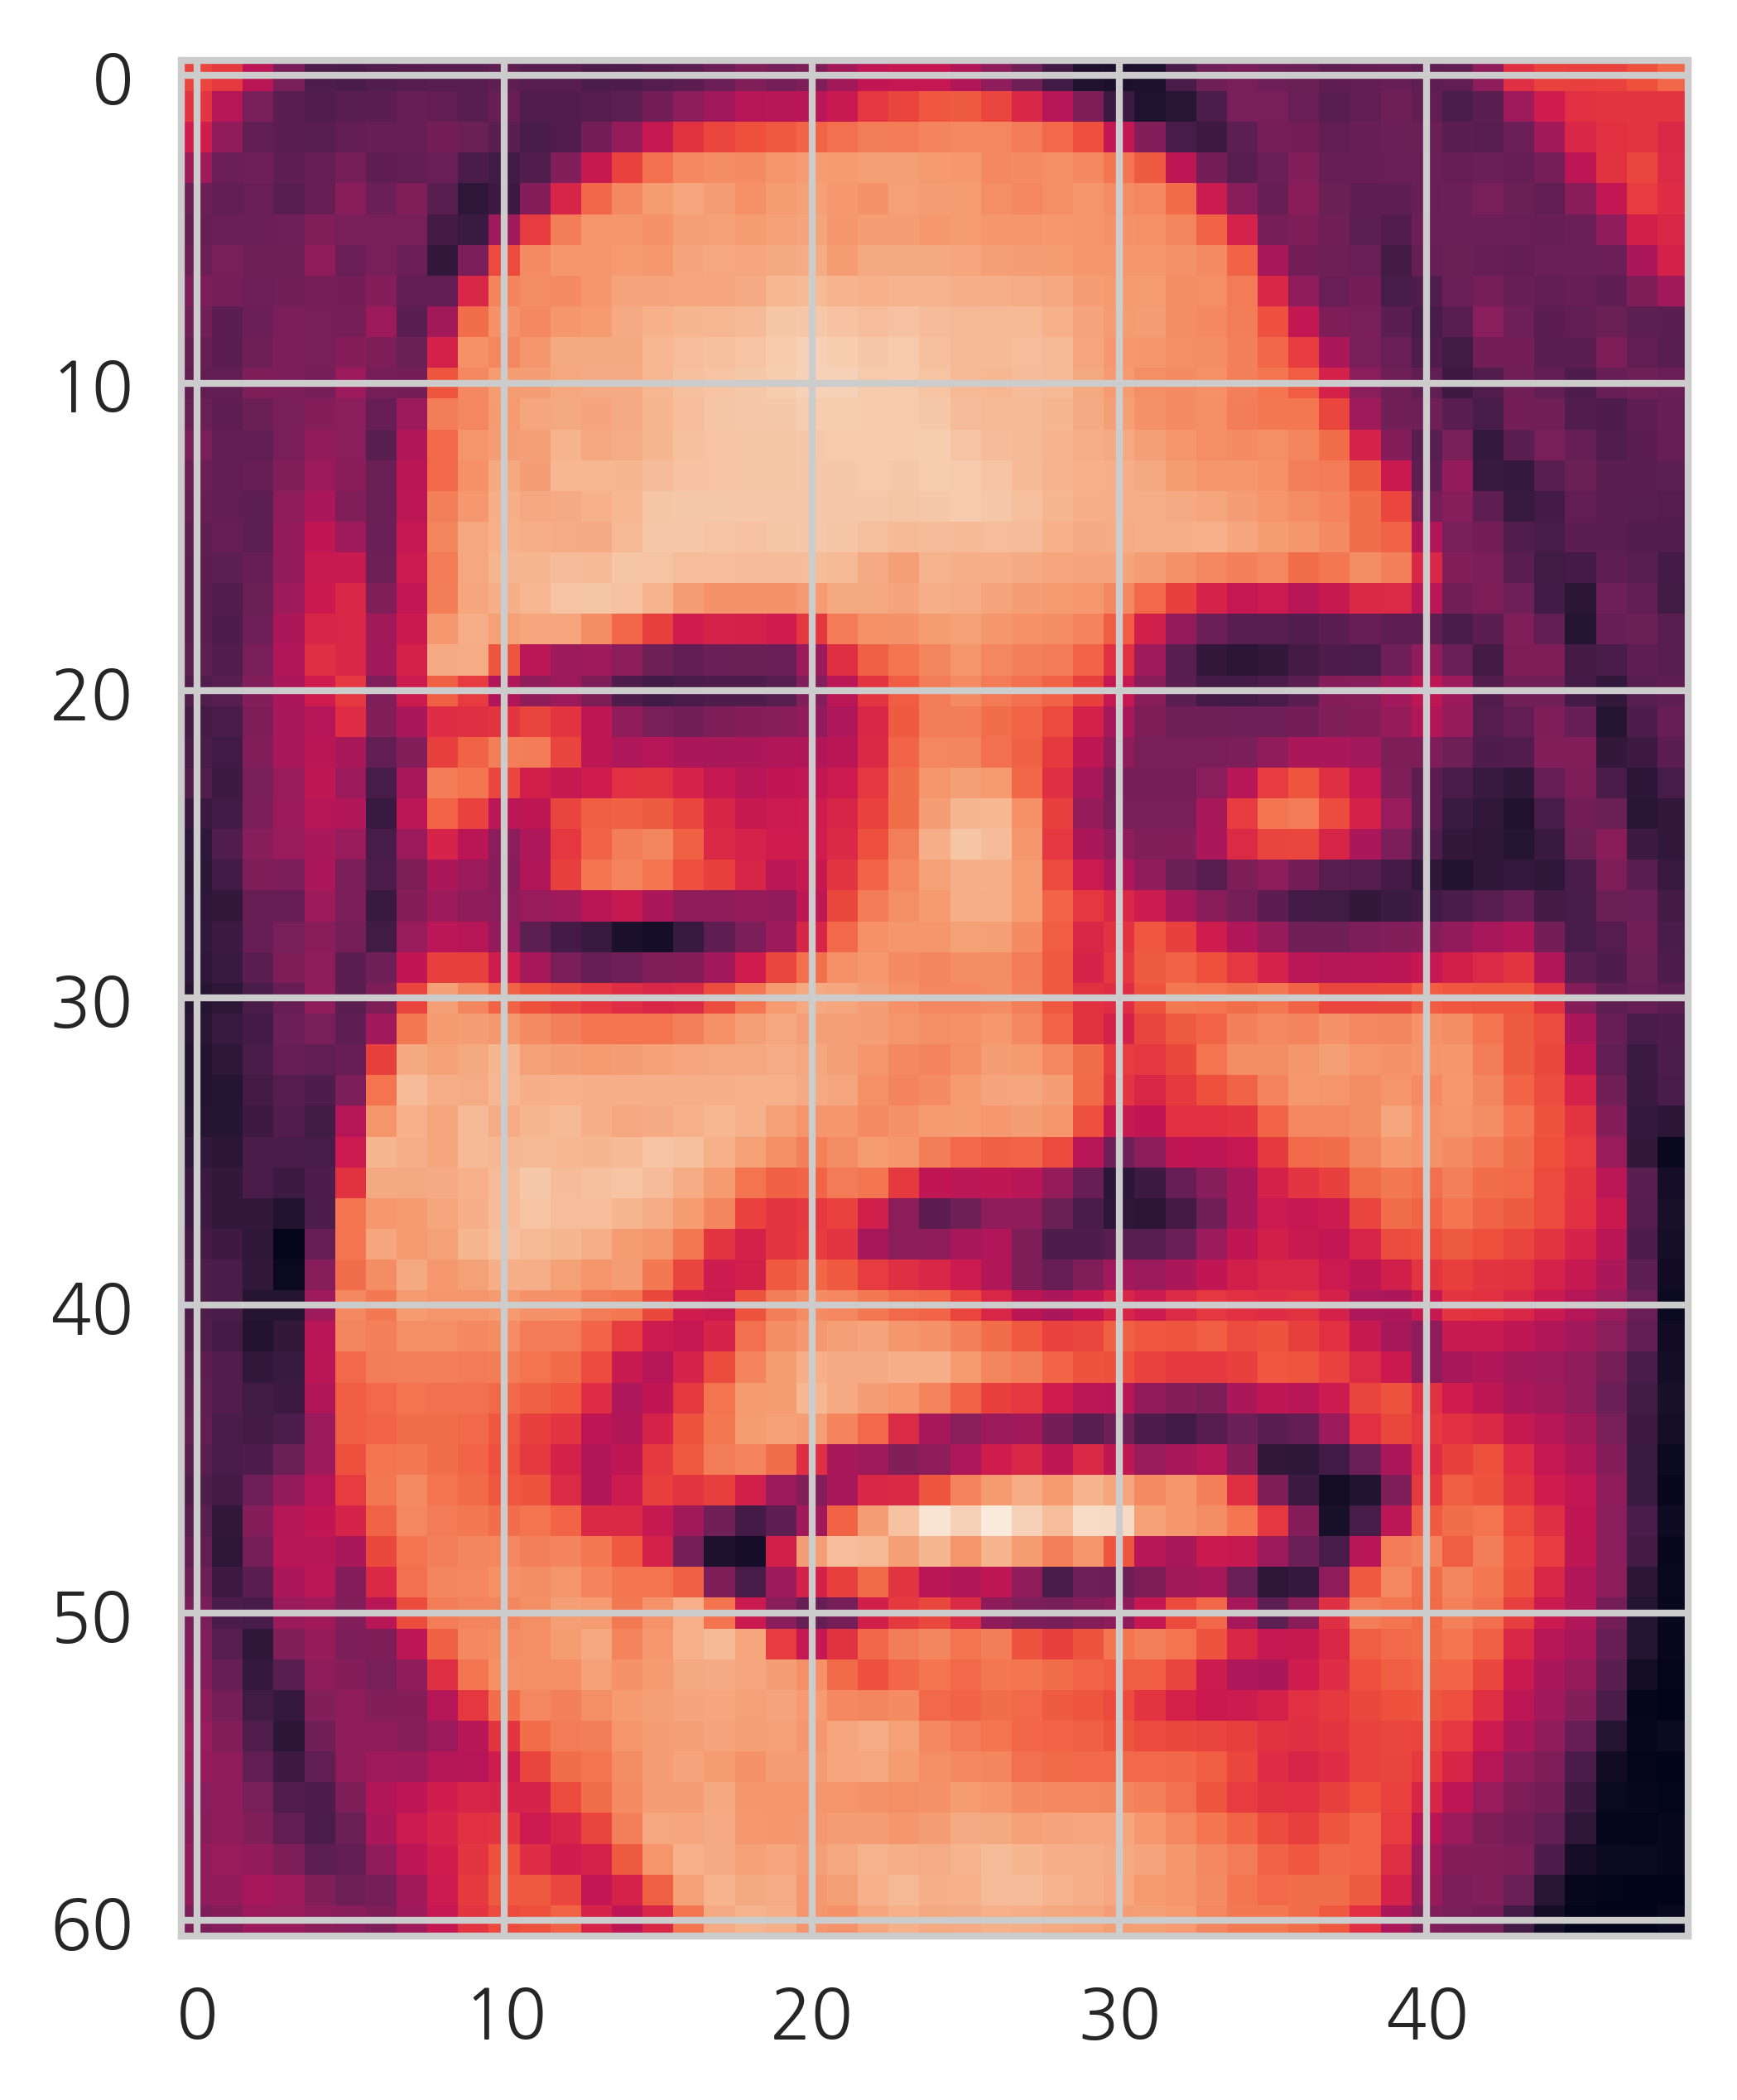

[1]


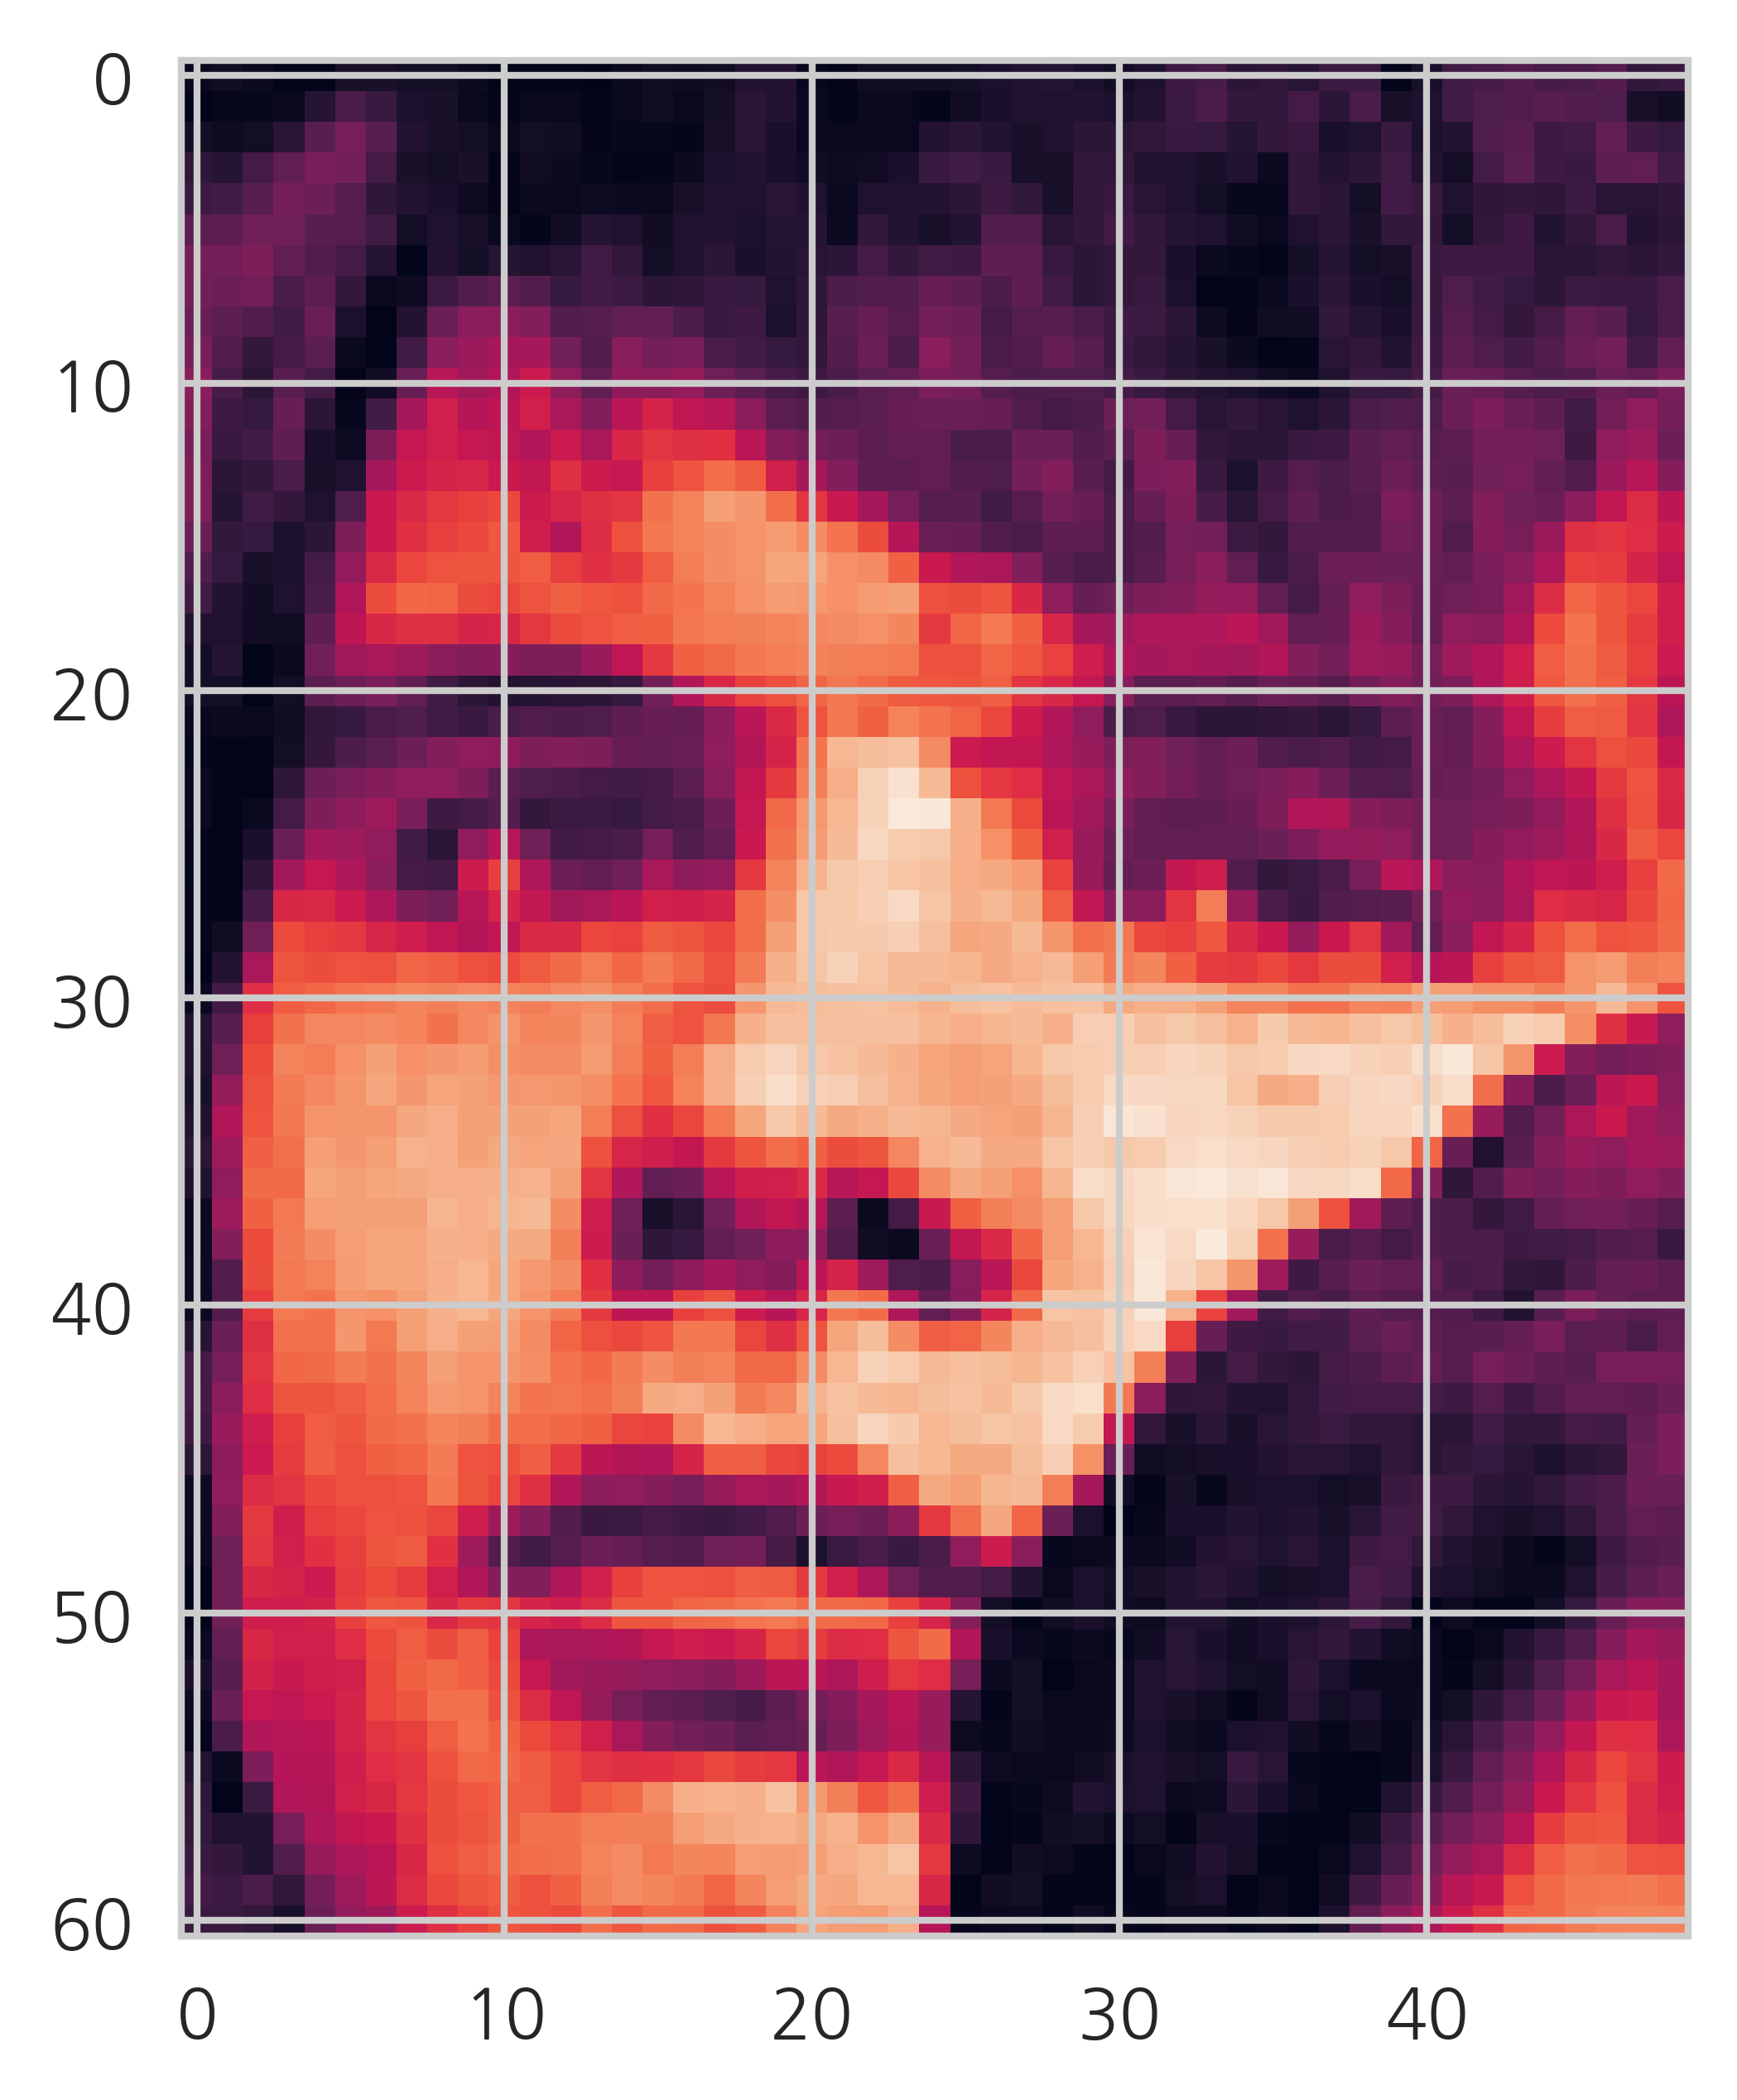

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.reset_default_graph()

def parser(serialized_example):
    features = {
        'age': tf.FixedLenFeature([1], tf.int64),
        'img': tf.FixedLenFeature([61*49], tf.int64)
    }
    parsed_feature = tf.parse_single_example(serialized_example, features)
    age = tf.cast(parsed_feature['age'], tf.int32)
    img = tf.cast(parsed_feature['img'], tf.float32)
    return age, img

dataset_dir = './dataset/face_train.tfrecord'
dataset = tf.contrib.data.TFRecordDataset(dataset_dir).map(parser)
dataset = dataset.batch(32)
dataset = dataset.shuffle(7777)

itr = dataset.make_one_shot_iterator()

age, img = itr.get_next()
img = tf.reshape(img, [-1, 61, 49])

with tf.Session() as sess:
    _age, _img = sess.run([age, img])
    for i in range(5):
        print(_age[i])
        plt.imshow(_img[i])
        plt.show()

># 3.3. use TFRecord to read Test Data